## Diabetes Prediction Using Decision Tree

## About the Dataset

Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Content

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

C:\Users\rc559\AppData\Local\Temp\ipykernel_8140\2198066214.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Loading the Dataset

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Shape of Dataset

In [3]:
df.shape

(768, 9)

## Basic info of Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Statistical Description of Dataset

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Checking Missing Value and Handle missing Value

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

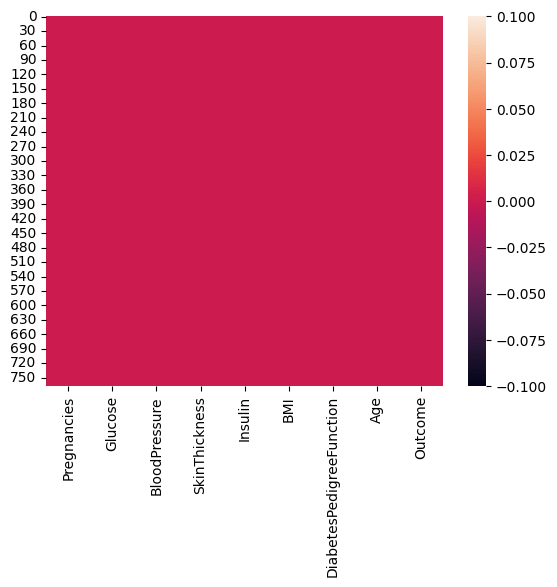

In [7]:
#checking missing value using heatmap
sns.heatmap(df.isnull())

## Checking Features of Dataset


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Checking Datatypes of All Features

In [9]:
for i in df.columns:
    print("Datatype of " , i , "column is " , df[i].dtype)

Datatype of  Pregnancies column is  int64
Datatype of  Glucose column is  int64
Datatype of  BloodPressure column is  int64
Datatype of  SkinThickness column is  int64
Datatype of  Insulin column is  int64
Datatype of  BMI column is  float64
Datatype of  DiabetesPedigreeFunction column is  float64
Datatype of  Age column is  int64
Datatype of  Outcome column is  int64


## Checking Outliers using Boxplot and Handling Outliers

<Axes: >

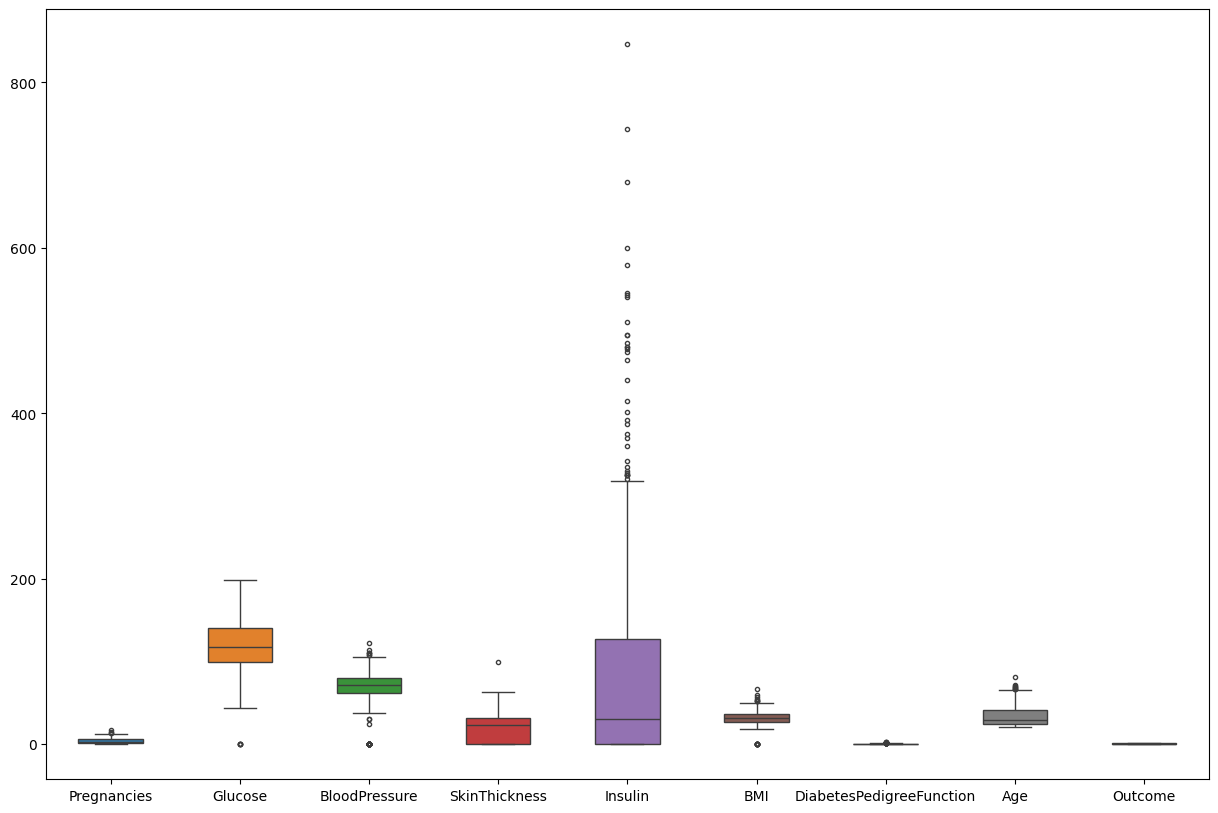

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [11]:
#insulin contains larger amount of outliers so we have to handle it
## Replace Outlier with Median value of Feature

minimum,q1,q2,q3,maximum = np.quantile(df['Insulin'],[0,0.25,0.50,0.75,1.0])
#calulate IQR
iqr = q3-q1
lower_fence = q1-1.5*(iqr)  #minimum
higher_fence = q3+1.5*(iqr) #maximum
#replacing outlier
median = df['Insulin'].median()   #using median maintian the distribution
df['Insulin'] = np.where(df['Insulin']>higher_fence,median,df['Insulin'])
df['Insulin'] = np.where(df['Insulin']<lower_fence,median,df['Insulin'])

## Divide Dataset into dependent and Independent Features


In [12]:
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## Standardization

 We do not standarized,scaling the dataset in decision tree because it takes too much time to split an make decision tree using small datapoints

## Model Training

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

## Visualize Decision Tree

[Text(0.4064885496183206, 0.9666666666666667, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.15394402035623408, 0.9, 'x[7] <= 28.5\ngini = 0.311\nsamples = 389\nvalue = [314, 75]'),
 Text(0.08396946564885496, 0.8333333333333334, 'x[5] <= 45.4\ngini = 0.167\nsamples = 217\nvalue = [197, 20]'),
 Text(0.05597964376590331, 0.7666666666666667, 'x[5] <= 30.95\ngini = 0.147\nsamples = 213\nvalue = [196, 17]'),
 Text(0.030534351145038167, 0.7, 'x[0] <= 7.5\ngini = 0.031\nsamples = 126\nvalue = [124, 2]'),
 Text(0.020356234096692113, 0.6333333333333333, 'x[6] <= 0.668\ngini = 0.016\nsamples = 125\nvalue = [124, 1]'),
 Text(0.010178117048346057, 0.5666666666666667, 'gini = 0.0\nsamples = 111\nvalue = [111, 0]'),
 Text(0.030534351145038167, 0.5666666666666667, 'x[6] <= 0.704\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.020356234096692113, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04071246819338423, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [13, 

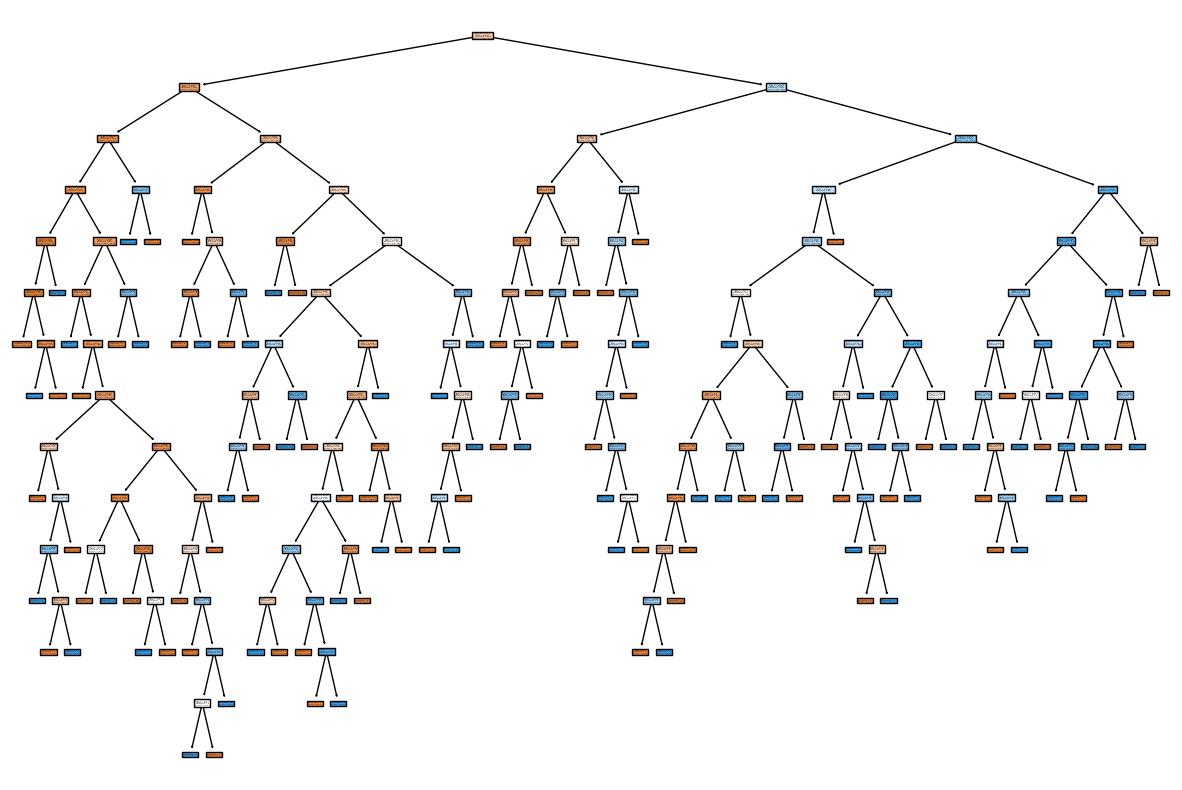

In [15]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(tree_classifier,filled=True)

## Prediction

In [16]:
y_pred = tree_classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[84 23]
 [15 32]]
0.7532467532467533
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       107
           1       0.58      0.68      0.63        47

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.75      0.76       154



## Hyperparameter Tunning

In [18]:
parameter = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(DecisionTreeClassifier(),param_grid=parameter,cv=5, scoring='accuracy')

#training
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [19]:
## prediction
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [20]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [21]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)



In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[88 20]
 [11 35]]
0.7987012987012987
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       108
           1       0.64      0.76      0.69        46

    accuracy                           0.80       154
   macro avg       0.76      0.79      0.77       154
weighted avg       0.81      0.80      0.80       154



## Saving The Model

In [24]:
import pickle
pickle.dump(model,open('decision_tree.pkl','wb')) #for model 

In [37]:
test =np.array([[6,123,72,45,230,33.6,0.733,34]])
pred = model.predict(test)
pred

array([0], dtype=int64)